# Orders - Multivariate Regression of  the `review_score`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Get dataset
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)

<AxesSubplot:>

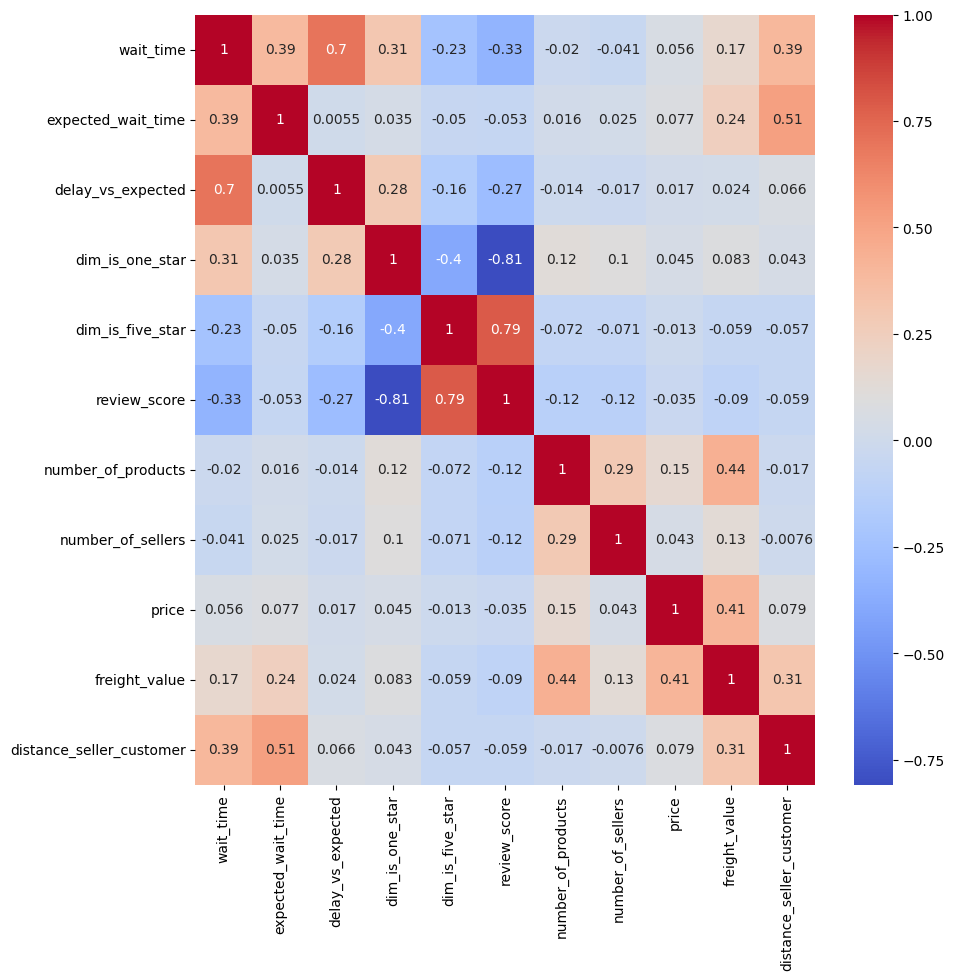

In [4]:
# Plot correlation matrix
plt.figure(figsize = (10, 10))

sns.heatmap(
    orders.corr(), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

In [ ]:
import statsmodels.formula.api as smf

In [7]:
# Fit a simple linear regression in a variable called model1 regressing review_score on wait_time
model1 = smf.ols('review_score ~ wait_time', data=orders).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:29:59   Log-Likelihood:            -1.5441e+05
No. Observations:               95872   AIC:                         3.088e+05
Df Residuals:                   95870   BIC:                         3.089e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7236      0.006    727.904      0.0

***Model 2***:

In [8]:
# Fit a simple linear regression in a variable called model1 regressing review_score on delay_vs_expected
model2 = smf.ols('review_score ~ delay_vs_expected', data=orders).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7681.
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:30:11   Log-Likelihood:            -1.5639e+05
No. Observations:               95872   AIC:                         3.128e+05
Df Residuals:                   95870   BIC:                         3.128e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.2121      0.00

In [9]:
# Fit a multiple linear regression in a variable called model3 regressing review_score on wait_time and delay_vs_expected
model3 = smf.ols('review_score ~ wait_time + delay_vs_expected', data=orders).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6191.
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:30:41   Log-Likelihood:            -1.5426e+05
No. Observations:               95872   AIC:                         3.085e+05
Df Residuals:                   95869   BIC:                         3.086e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.6502      0.00

In [10]:
# Create a variable called features with the list of features to use in the model (all numerical features)
features = [
    "wait_time",
    "delay_vs_expected",
    "number_of_products",
    "number_of_sellers",
    "price",
    "freight_value",
    "distance_seller_customer",
]

In [11]:
# Standardize the features
orders_standardized = orders.copy()
for f in features:
    mu = orders[f].mean()
    sigma = orders[f].std()
    orders_standardized[f] = orders[f].map(lambda x: (x - mu) / sigma)
orders_standardized

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_one_star,dim_is_five_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,-0.431192,15.544063,-0.161781,delivered,0,0,4,-0.264595,-0.112544,-0.513802,-0.652038,-0.979475
1,53cdb2fc8bc7dce0b6741e2150273451,0.134174,19.137766,-0.161781,delivered,0,0,4,-0.264595,-0.112544,-0.086640,0.000467,0.429743
2,47770eb9100c2d0c44946d9cf07ec65d,-0.329907,26.639711,-0.161781,delivered,0,1,5,-0.264595,-0.112544,0.111748,-0.164053,-0.145495
3,949d5b44dbf5de918fe9c16f97b45f8a,0.073540,26.188819,-0.161781,delivered,0,1,5,-0.264595,-0.112544,-0.441525,0.206815,2.054621
4,ad21c59c0840e6cb83a9ceb5573f8159,-1.019535,12.112049,-0.161781,delivered,0,1,5,-0.264595,-0.112544,-0.562388,-0.652038,-0.959115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,9c5dedf39a927c1b2549525ed64a053c,-0.454309,18.587442,-0.161781,delivered,0,1,5,-0.264595,-0.112544,-0.311513,-0.449408,-0.893033
95876,63943bddc261676b46f01ca7ac2f7bd8,1.023841,23.459051,-0.161781,delivered,0,0,4,-0.264595,-0.112544,0.183977,-0.123156,-0.212797
95877,83c1379a015df1e13d02aae0204711ab,1.305780,30.384225,-0.161781,delivered,0,1,5,-0.264595,-0.112544,0.333684,1.964490,0.617630
95878,11c177c8e97725db2631073c19f07b62,0.483664,37.105243,-0.161781,delivered,0,0,2,1.601605,-0.112544,1.075186,2.715522,-0.387558


In [12]:
# Create a variable called formula with the formula to use in the model
formula = "review_score ~ " + ' + '.join(features)
formula

'review_score ~ wait_time + delay_vs_expected + number_of_products + number_of_sellers + price + freight_value + distance_seller_customer'

In [13]:
# Fit a multiple linear regression in a variable called model4 regressing review_score on all the features
model4 = smf.ols(formula = formula, data = orders_standardized).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2322.
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:32:23   Log-Likelihood:            -1.5258e+05
No. Observations:               95872   AIC:                         3.052e+05
Df Residuals:                   95864   BIC:                         3.052e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

<AxesSubplot:>

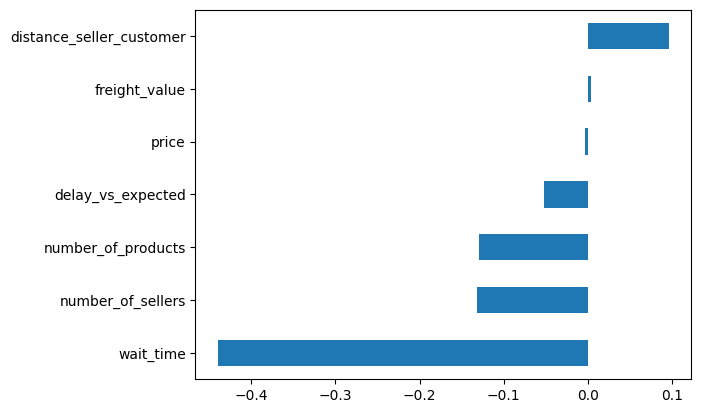

In [14]:
# Comparing the coefficients of each feature in the model
model4.params[1:].sort_values().plot(kind='barh')

In [15]:
# Comparing the p-values of each feature in the model
predicted_review_score = model4.predict(orders_standardized[features])
residuals = predicted_review_score - orders_standardized.review_score

📊 Plot the `residuals` in a histogram.

In [17]:
#Get the RMSE
rmse = (residuals**2).mean()**0.5
rmse

1.1883154116821097

Text(0.5, 1.0, 'residuals density plot')

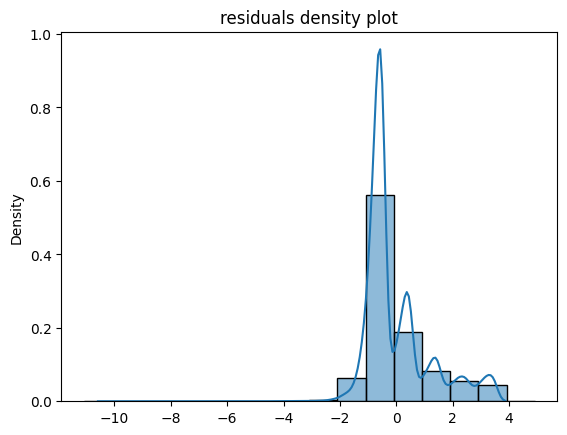

In [18]:
# Plot the residuals distribution
sns.histplot(residuals, kde=True, stat='density', discrete=True)
plt.title('residuals density plot')

Text(0.5, 1.0, 'distribution of predicted and actual values')

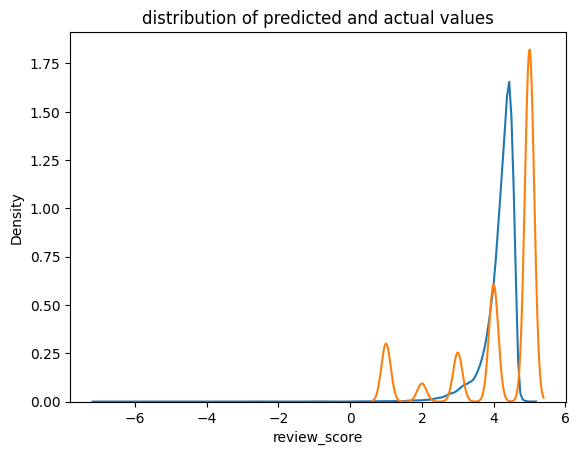

In [20]:
sns.kdeplot(predicted_review_score, label='predicted review score')
sns.kdeplot(orders.review_score, label = 'actual review score')
plt.title('distribution of predicted and actual values')

(0.0, 5.944824571693946)

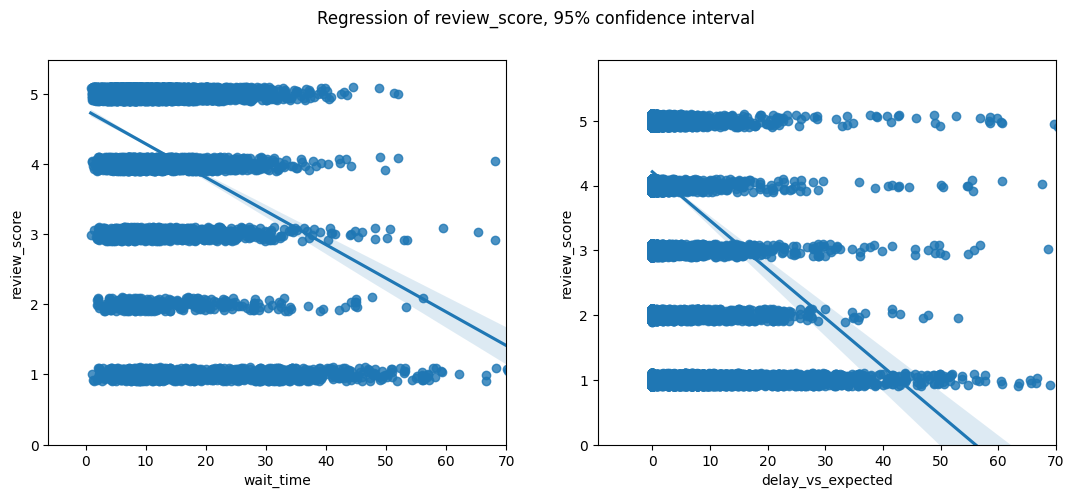

In [21]:
sample = orders.sample(10000, random_state=42)
plt.figure(figsize=(13,5))
plt.suptitle('Regression of review_score, 95% confidence interval')
plt.subplot(1,2,1)
sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = orders.delay_vs_expected, y= orders.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)